In [5]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt


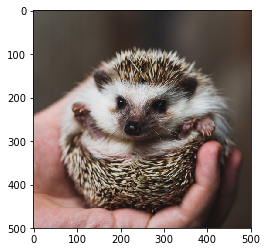

In [15]:
img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #ここ！！
plt.plot(), plt.imshow(img)
plt.show()

# スケーリング(拡大・縮小)

スケーリングは画像のサイズ変更のみを行う．この変換のために cv2.resize() 関数が用意されている．変更後の画像サイズもしくは縮尺を指定する必要がある．補間方法には複数あるが，縮小には cv2.INTER_AREA ，拡大には cv2.INTER_CUBIC (処理が遅い) や cv2.INTER_LINEAR が適している．デフォルトｎの補間方法は cv2.INTER_LINEAR である．

fx –
水平軸方向のスケールファクタ．

fy –
垂直軸方向のスケールファクタ．

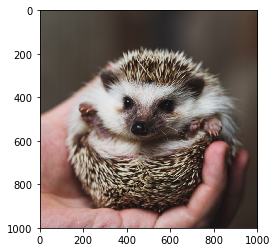

In [16]:
#メモリが1000で、画像が倍になってる
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.plot(), plt.imshow(res)
plt.show()

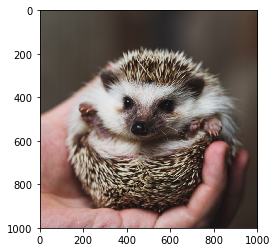

In [18]:
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC) #別の書き方
plt.plot(), plt.imshow(res)
plt.show()

# 並進

並進は物体の位置を移動させる処理である．(x,y)方向への移動量が (t_x,t_y) であるとすれば，この並進を表す変換行列 \textbf{M} は以下のようになる:

データ型が np.float32 のNumpyの配列に値を設定し， cv2.warpAffine(img,M,Size) 関数に与える．

次の例では移動量を (100,50) としている

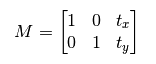

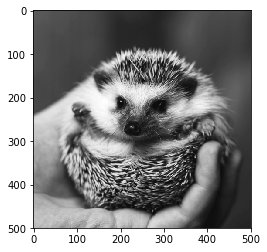

In [37]:
img = cv2.imread('../../img/hari.jpg',0)
plt.plot(), plt.imshow(img,cmap="gray") #ここ！
plt.show()

(500, 500)


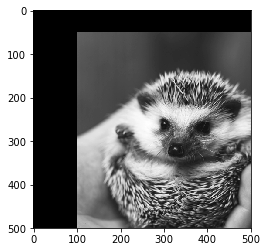

In [41]:
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
print(dst.shape)
plt.plot(), plt.imshow(dst,cmap="gray")
plt.show()

Warning cv2.warpAffine(img,M,Size) 関数の第3引数Sizeには出力画像のサイズを (width, height) という形式で指定しなければならない。ここでwidthは列の数，heightは行の数である．

# 回転

変換行列を計算するために cv2.getRotationMatrix2D 関数が用意されている．次の例はスケーリングをせずに画像中心に対して90度回転する変換を行う

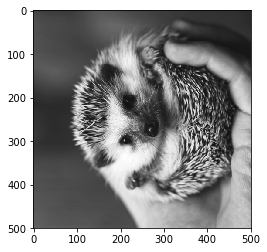

In [43]:
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.plot(), plt.imshow(dst,cmap="gray")
plt.show()

# アフィン変換

アフィン変換においては、元画像で並行な直線はみな、変換後の画像においても並行性が保れるという性質がある．変換行列を計算するには、入力画像と出力画像の対応点の座標が少なくとも3組必要である．cv2.getAffineTransform 関数を使い2x3の変換行列を作成し， それをcv2.warpAffine 関数に与えて画像を変換する．

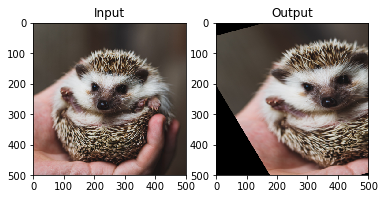

In [47]:
img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


# 射影変換

射影変換は3x3の変換行列が必要である．変換の前後で直線性が保たれる．変換行列を計算するには少なくとも4組の対応点の座標が必要で、しかもこれら4点のどの3点をとっても同一の直線上に乗らないよう選ぶ必要がある． cv2.getPerspectiveTransform 関数を使って変換行列を計算し， cv2.warpPerspective 関数を使って画像を変形する．

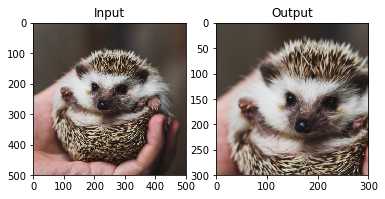

In [48]:
img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()